Maestría Inteligencia de Negocios y Análisis de Datos\
Curso: Statistical Learning II\
Alumno: 22008067- Luis Pedro Perez

# Laboratorio #2

### Problema #1

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

Se utilizará la foto de el Arco de Cabo san Lucas, Baja California Sur
![Arco de Cabo](https://a.cdn-hotels.com/gdcs/production171/d1958/0b23e146-74c8-4907-85c5-a0f9d24059e3.jpg?impolicy=fcrop&w=800&h=533&q=medium)

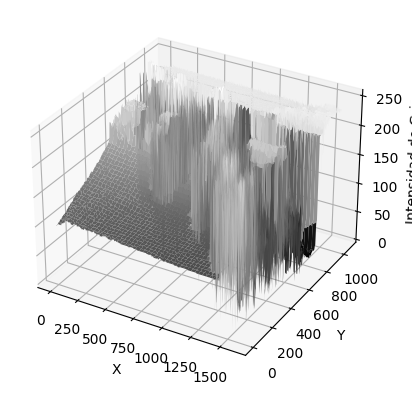

In [23]:
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_img_3d(imagen):
    # Se obtienen las dimensiones de la imagen
    alto, ancho = imagen.shape
    
    # Se establecen la malla de coordenadas X e Y
    x = np.arange(0, ancho, 1)
    y = np.arange(0, alto, 1)
    X, Y = np.meshgrid(x, y)
    
    # Se extraen los valores de intensidad de gris de la imagen
    Z = imagen
    
    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie en 3D
    ax.plot_surface(X, Y, Z, cmap='gray')
    
    # Se configuran las etiquetas de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la figura
    plt.show()

# Se carga la imagen a utilizar con OpenCV
imagen = 'cabo.jpg'
img_color = cv2.imread(imagen, cv2.IMREAD_COLOR)

# Se convierte la imagen a escala de grises
img_gris = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en 3D
plot_img_3d(img_gris)


### Problema #2

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

*Se utilizará la foto del Salar de Uyuni en Bolivia* (Rickyrick Ricon, 2018)
![Salar Uyuni](https://i.ytimg.com/vi/JkfcTPZkTxc/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLA7mVSve1hoKfSZoiRnMKHh1UPjkQ)

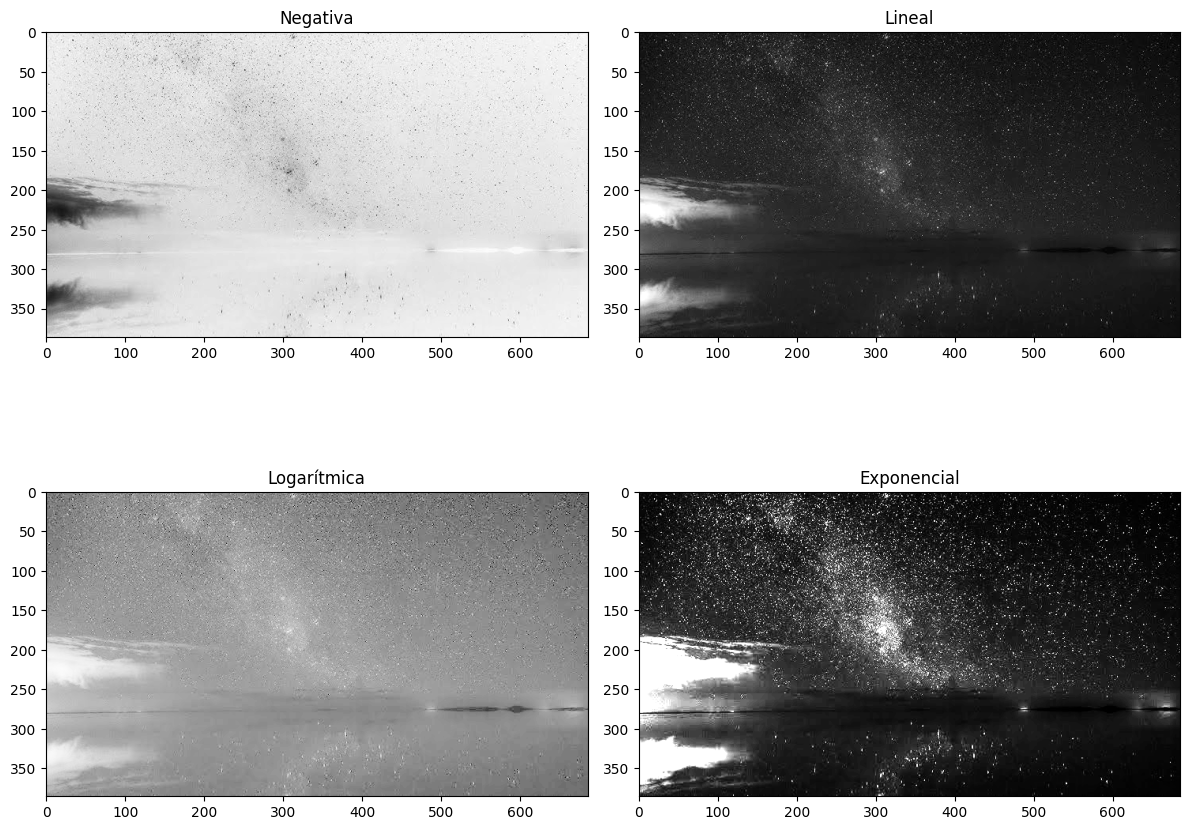

In [33]:
# Se define la función para transformación a negativo
def transf_neg(img):
    neg_img = 255 - img
    return neg_img

# Se define la función para transformación lineal
def transf_lin(img, a, b):
    linear_img = np.clip(a * img + b, 0, 255).astype(np.uint8)
    return linear_img

# Se define la función para transformación logarítmica
def transf_log(img, c):
    log_img = c * np.log(1 + img)
    return log_img

# Se define la función para transformación exponencial
def transf_exp(img, c, gamma):
    exp_img = c * np.power(img, gamma)
    exp_img = np.clip(exp_img, 0, 255).astype(np.uint8)
    return exp_img

imagen = 'hq720.jpg'
img_gris = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

# Transformación negativa
img_neg = transf_neg(img_gris)

# Transformación lineal
a = 1.5
b = 50
img_lineal = transf_lin(img_gris, a, b)

# Transformación logarítmica
c = 30
img_log = transf_log(img_gris, c)

# Transformación exponencial
c = 0.02
gamma = 2.5
img_exp = transf_exp(img_gris, c, gamma)

# Mostrar las imágenes transformadas
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.imshow(img_neg, cmap='gray')
plt.title('Negativa')

plt.subplot(222)
plt.imshow(img_lineal, cmap='gray')
plt.title('Lineal')

plt.subplot(223)
plt.imshow(img_log, cmap='gray')
plt.title('Logarítmica')

plt.subplot(224)
plt.imshow(img_exp, cmap='gray')
plt.title('Exponencial')

plt.tight_layout()
plt.show()
